## Phylogenetic Trees

You can find the details in :

https://biopython.org/wiki/Phylo



In [2]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 59.4 MB/s eta 0:00:00


Let's import the necessary librairies

In [3]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
import matplotlib
import matplotlib.pyplot as plt

Upload the data and set the default method for a **distance based method**.

In [4]:
# Read the sequences and align
align = AlignIO.read('msa.phy','phylip')

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

# Creating a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

In [5]:
from Bio import SeqIO

records = SeqIO.parse("msa.phy", "phylip")
count = SeqIO.write(records, "msa.fasta", "fasta")
print("Converted %i records" % count)

Converted 6 records


In [6]:
distMatrix.names

['homo_sapie', 'chimpanzee', 'bonobo', 'gorilla', 'orangutan', 'sumatran']

In [7]:
distMatrix.matrix

[[0],
 [0.22695887120984692, 0],
 [0.22095466826778742, 0.09696787751425995, 0],
 [0.2668868207745422, 0.25788051636145304, 0.24977484238967274, 0],
 [0.31732212548784144,
  0.32182527769438607,
  0.3161212848994296,
  0.322425697988592,
  0],
 [0.3140198138697088,
  0.3281296907835485,
  0.3242269588712099,
  0.3284299009306515,
  0.1531071750225158,
  0]]

In [8]:
for i in range(len(distMatrix.matrix)):
    print(distMatrix.matrix[i])

[0]
[0.22695887120984692, 0]
[0.22095466826778742, 0.09696787751425995, 0]
[0.2668868207745422, 0.25788051636145304, 0.24977484238967274, 0]
[0.31732212548784144, 0.32182527769438607, 0.3161212848994296, 0.322425697988592, 0]
[0.3140198138697088, 0.3281296907835485, 0.3242269588712099, 0.3284299009306515, 0.1531071750225158, 0]


In [9]:
import numpy as np

print(distMatrix.names)

for i in range(len(distMatrix.matrix)):
    print(np.round(distMatrix.matrix[i],3))

['homo_sapie', 'chimpanzee', 'bonobo', 'gorilla', 'orangutan', 'sumatran']
[0]
[0.227 0.   ]
[0.221 0.097 0.   ]
[0.267 0.258 0.25  0.   ]
[0.317 0.322 0.316 0.322 0.   ]
[0.314 0.328 0.324 0.328 0.153 0.   ]


### For UPGMA

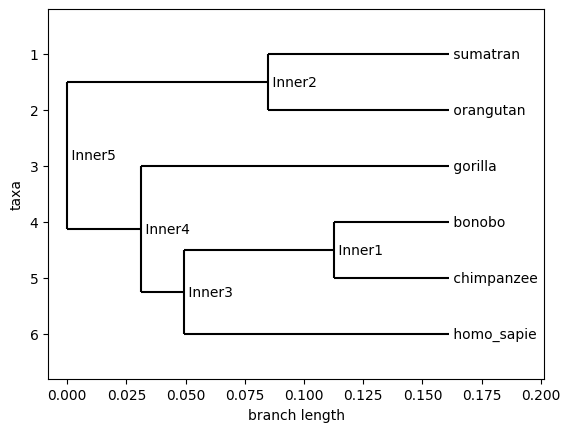

In [11]:
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(UPGMATree)

In [12]:
print(UPGMATree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.08458420894626237, name='Inner2')
            Clade(branch_length=0.0765535875112579, name='sumatran')
            Clade(branch_length=0.0765535875112579, name='orangutan')
        Clade(branch_length=0.03095917141999402, name='Inner4')
            Clade(branch_length=0.13017862503752625, name='gorilla')
            Clade(branch_length=0.018200240168117665, name='Inner3')
                Clade(branch_length=0.06349444611227861, name='Inner1')
                    Clade(branch_length=0.048483938757129974, name='bonobo')
                    Clade(branch_length=0.048483938757129974, name='chimpanzee')
                Clade(branch_length=0.11197838486940859, name='homo_sapie')


In [13]:
UPGMATree.format("newick")

'((sumatran:0.07655,orangutan:0.07655)Inner2:0.08458,(gorilla:0.13018,((bonobo:0.04848,chimpanzee:0.04848)Inner1:0.06349,homo_sapie:0.11198)Inner3:0.01820)Inner4:0.03096)Inner5:0.00000;\n'

                                    _______________________________ sumatran
  _________________________________|
 |                                 |_______________________________ orangutan
_|
 |            _____________________________________________________ gorilla
 |           |
 |___________|                                  ___________________ bonobo
             |        _________________________|
             |_______|                         |___________________ chimpanzee
                     |
                     |_____________________________________________ homo_sapie



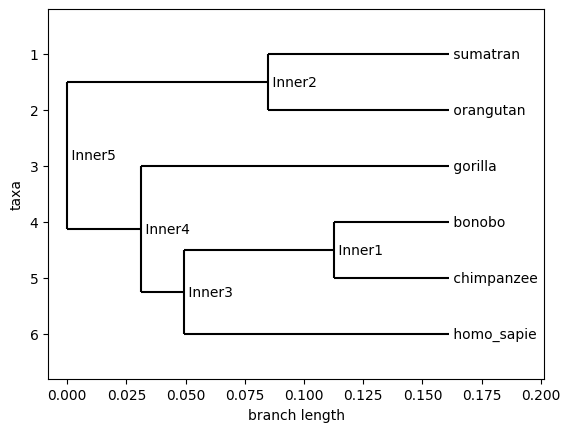

In [14]:
# Save the phylogenetic tree as a figure in your computer
Phylo.draw(UPGMATree, do_show=False)
plt.savefig('UPGMA.png')

# Printing the phlyogenetic tree using terminal
Phylo.draw_ascii(UPGMATree)

### For NJ

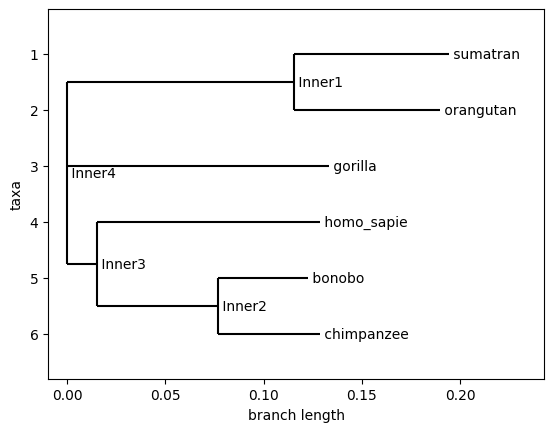

In [15]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(NJTree)

In [16]:
print(NJTree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.11554338036625639, name='Inner1')
            Clade(branch_length=0.07869258480936658, name='sumatran')
            Clade(branch_length=0.07441459021314922, name='orangutan')
        Clade(branch_length=0.13333083158210746, name='gorilla')
        Clade(branch_length=0.015048033623536461, name='Inner3')
            Clade(branch_length=0.11351696187331131, name='homo_sapie')
            Clade(branch_length=0.06195586910837589, name='Inner2')
                Clade(branch_length=0.04533173221254874, name='bonobo')
                Clade(branch_length=0.051636145301711206, name='chimpanzee')


                                         __________________________ sumatran
  ______________________________________|
 |                                      |________________________ orangutan
 |
_|____________________________________________ gorilla
 |
 |     _____________________________________ homo_sapie
 |____|
      |                     ______________ bonobo
      |____________________|
                           |________________ chimpanzee



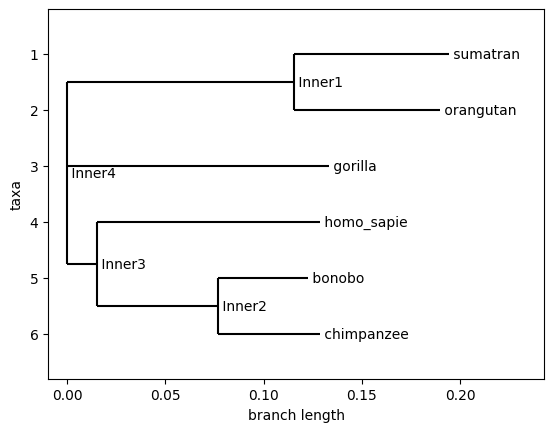

In [17]:
# Save the phylogenetic tree as a figure in your computer
Phylo.draw(NJTree, do_show=False)
plt.savefig('NJ.png')

# Printing the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)

## Phylogenetic Tree example using MAFFT results

## From fasta to phylip

In [18]:
from Bio import SeqIO

records = SeqIO.parse("aligned_file.fasta", "fasta")
count = SeqIO.write(records, "aligned_file.phy", "phylip")
print("Converted %i records" % count)

Converted 35 records


In [19]:
# Read the sequences and align
align = AlignIO.read('aligned_file.phy','phylip')

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

# Creating a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

## For UPGMA

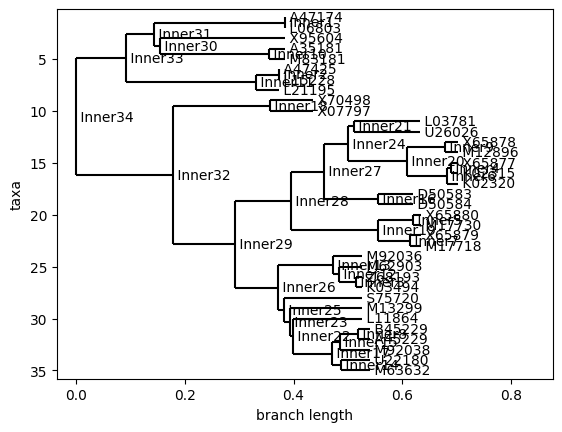

In [20]:
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(UPGMATree)

# Printing the phlyogenetic tree using terminal
#Phylo.draw_ascii(UPGMATree)

Let's modify the dimensions of the tree

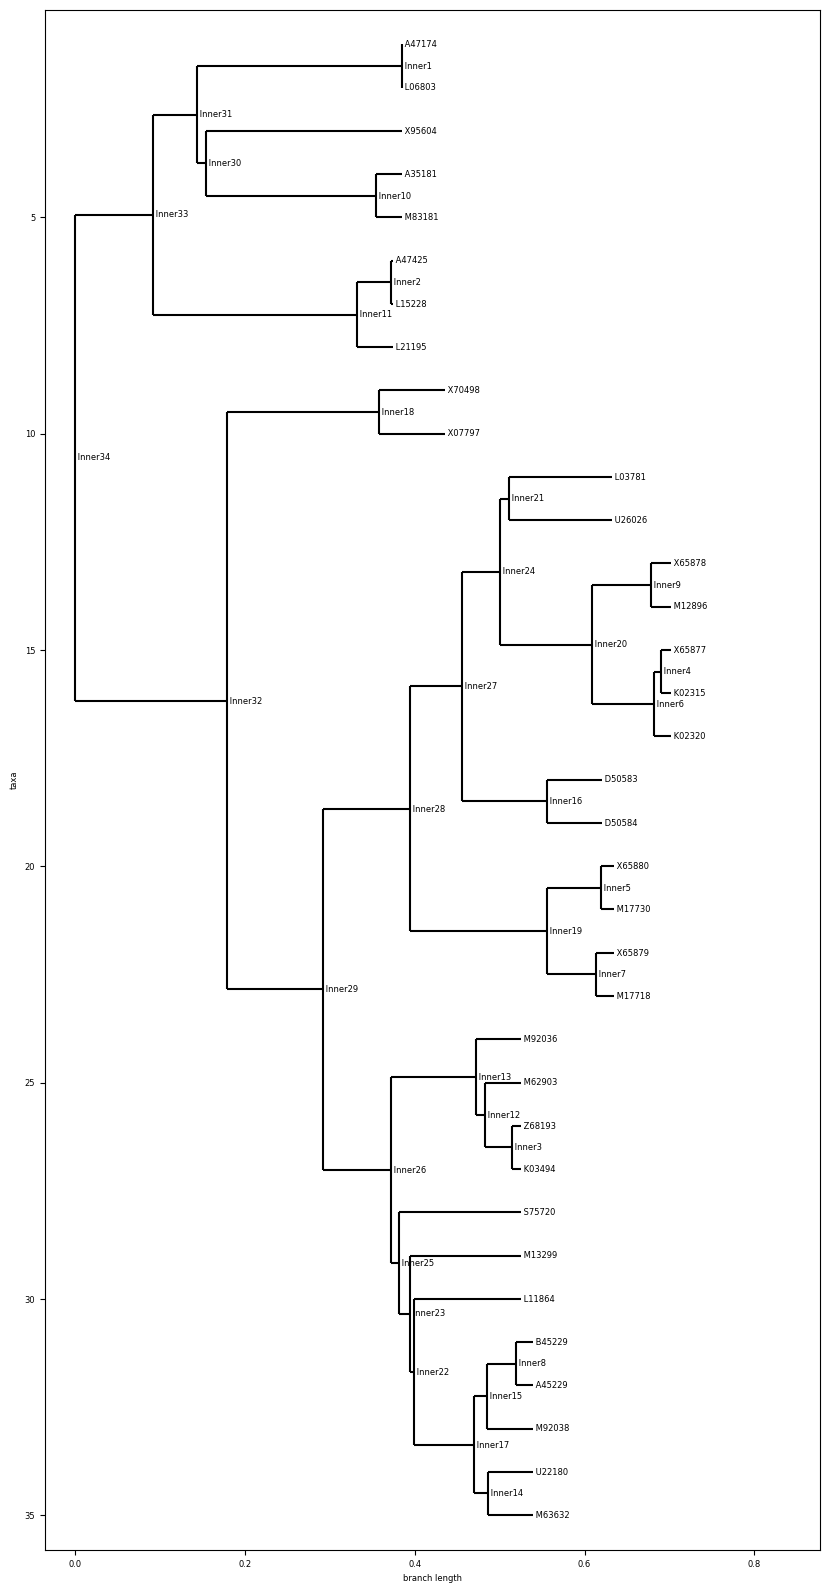

In [21]:
matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

### Changing the color of the branches

How can I located the brach of interest to change its color?

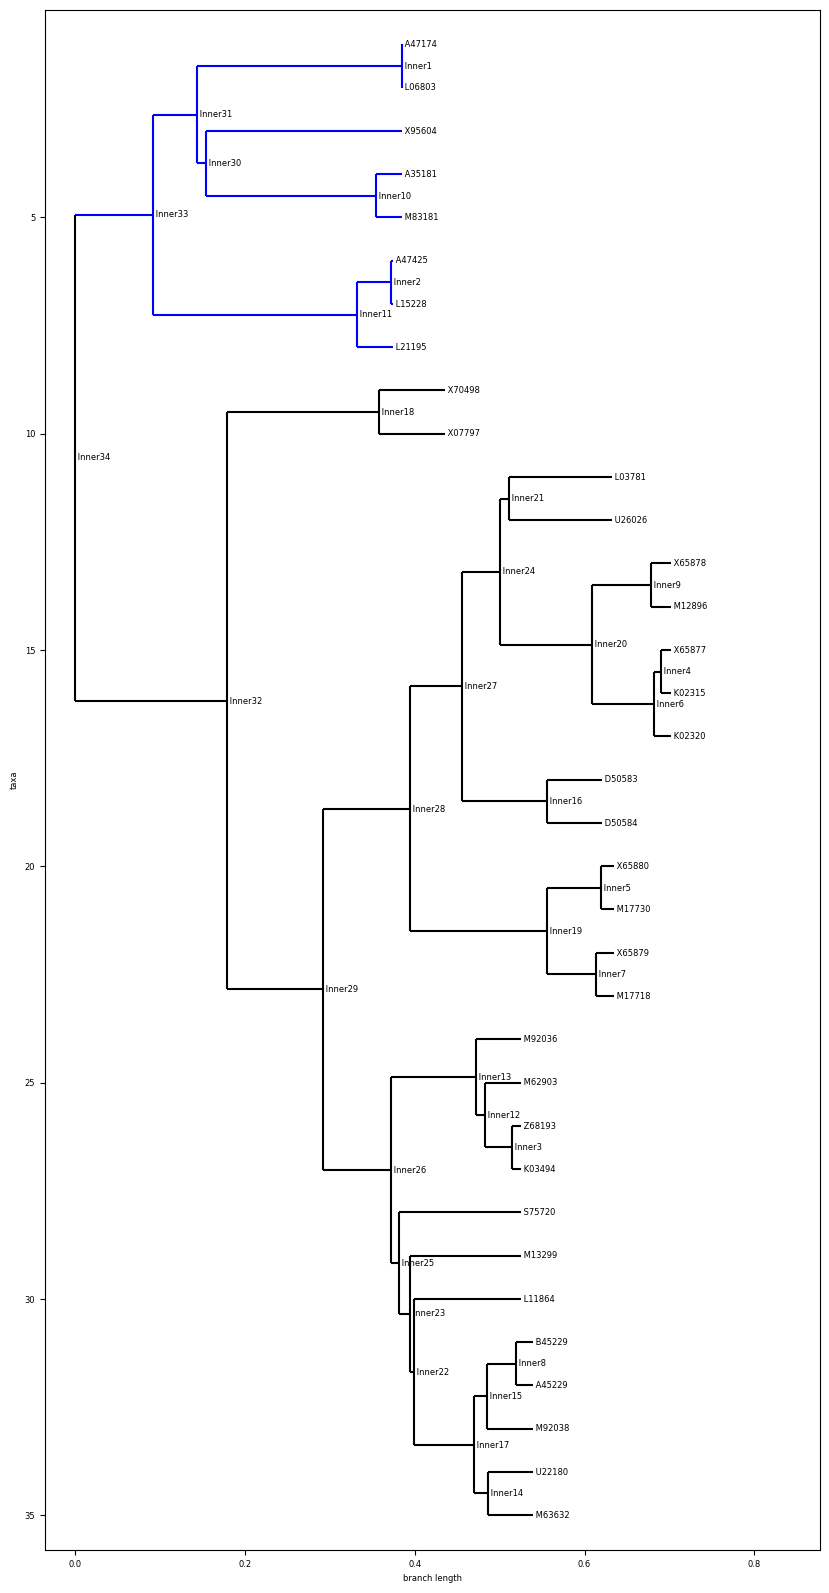

In [22]:
## Selecting the first branch from top to bottom in the first level
UPGMATree.clade[0].color = "blue"

matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

In [23]:
## From top to bottom: branch1-level1, branch 1-level2
UPGMATree.clade[0, 0].color = "magenta"

## From top to bottom: branch2-level1, branch1-level2, branch1-level3
UPGMATree.clade[1, 0, 0].color = "red"

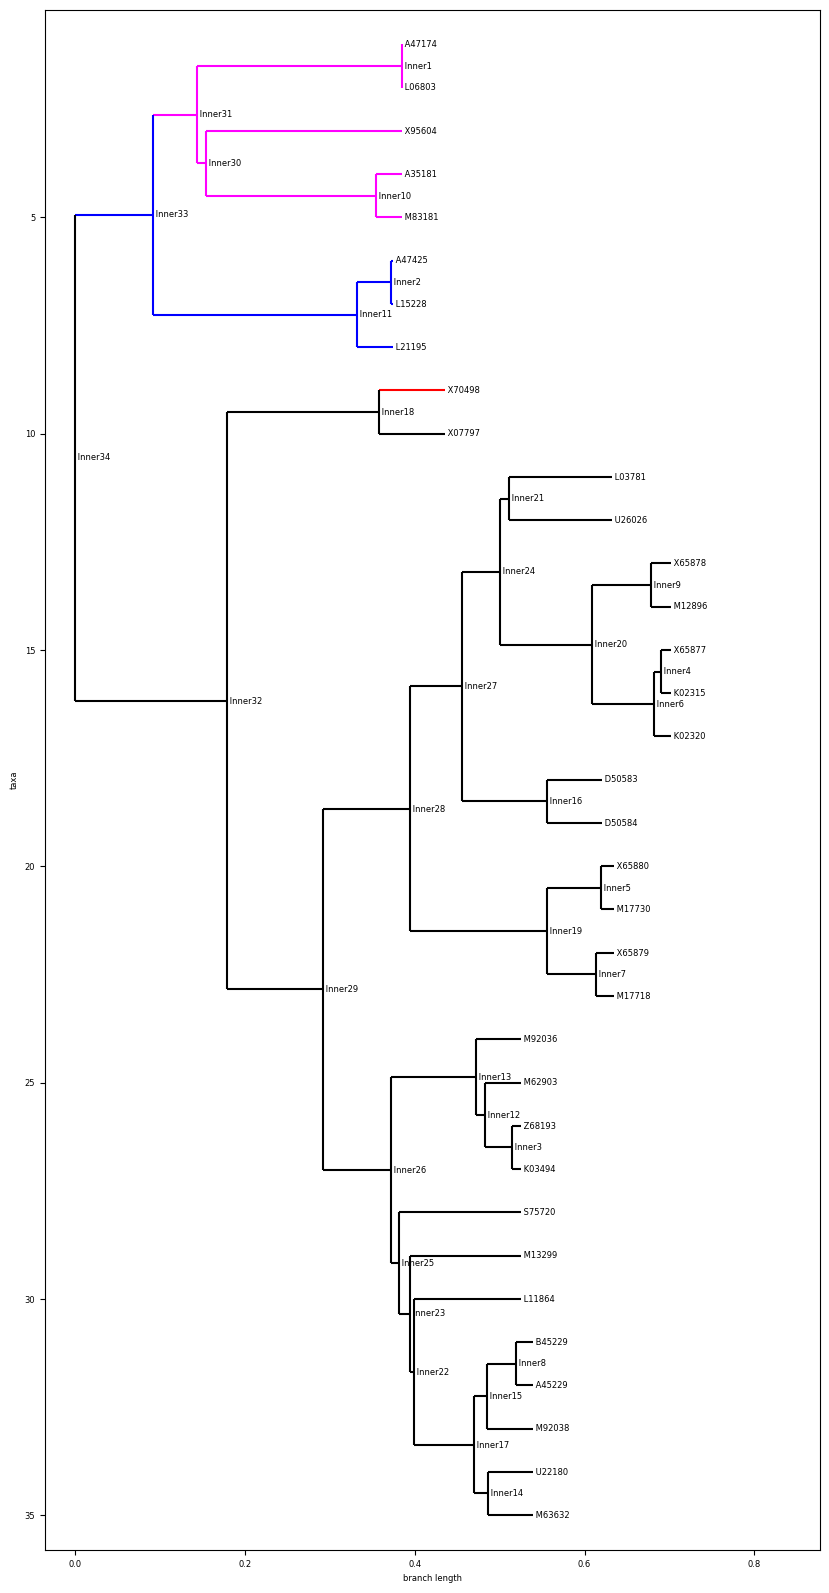

In [24]:
matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)
#Phylo.draw(UPGMATree, axes=axes, do_show=False)
#plt.savefig('UPGMA2.png', dpi=100)


## For NJ

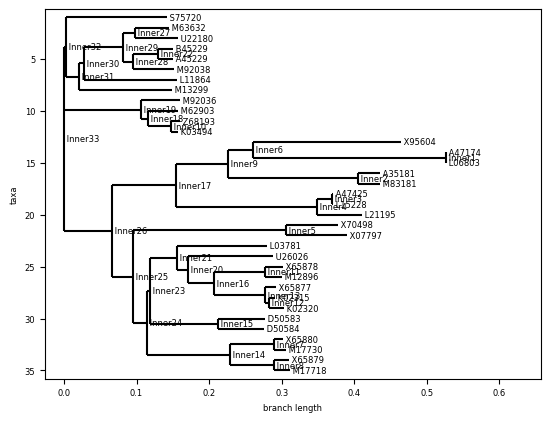

  _________________ S75720
 |
 |            _____ M63632
 |          _|
 |         | |______ U22180
 |   ______|
 |  |      |      __ B45229
 |  |      |  ___|
 | ,|      |_|   |__ A45229
 | ||        |
 | ||        |______ M92038
 |_||
 | ||_______________ L11864
 | |
 | |________________ M13299
 |
 |             ______ M92036
 |____________|
 |            | _____ M62903
 |            ||
 |             |    _ Z68193
 |             |___|
_|                 |_ K03494
 |
 |                                 _________________________ X95604
 |                            ____|
 |                           |    |                                 , A47174
 |                           |    |_________________________________|
 |                   ________|                                      | L06803
 |                  |        |
 |                  |        |                       ___ A35181
 |                  |        |______________________|
 |        __________|                            

In [25]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(NJTree)

# Printing the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)
